# Entregável 1 - visão computacional

In [28]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [29]:
rintin = cv2.imread("RinTinTin.jpg")

In [30]:
rintin.shape

(240, 320, 3)

In [31]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [32]:
rintin_gray.shape

(240, 320)

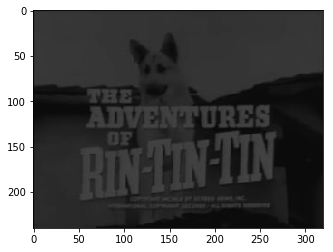

In [33]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

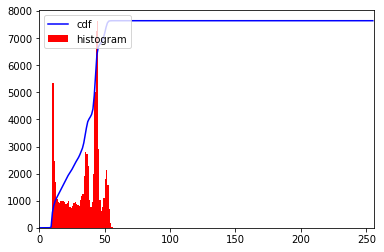

In [34]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

### 1.

Não, o histograma fornecido não aproveita bem a faixa de cores.

### 2. 

In [35]:
rintin_gray.min()

8

In [36]:
saida = rintin_gray.copy()

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = rintin_gray[i][j] - 8

In [37]:
saida.max()

50

In [38]:
for i in range(saida.shape[0]):
    for j in range(saida.shape[1]):
        saida[i][j] = saida[i][j]*5.1

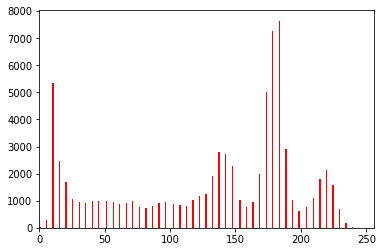

In [39]:
plt.hist(saida.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.show()

### 3.

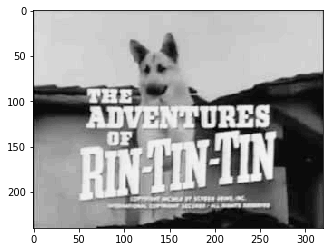

In [40]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


### 1.

In [41]:
canto_sala = cv2.imread("cena_canto_sala.jpg")

In [42]:
canto_sala_rgb = cv2.cvtColor(canto_sala, cv2.COLOR_BGR2RGB)

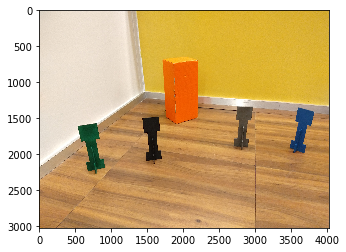

In [43]:
plt.imshow(canto_sala_rgb, interpolation="none")

In [44]:
r_chanel = canto_sala_rgb[:, :, 0]
b_chanel = canto_sala_rgb[:, :, 2]

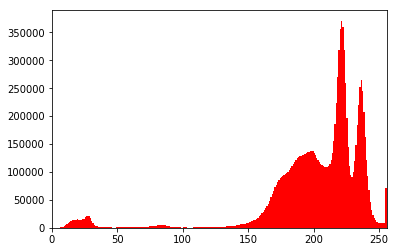

In [45]:
plt.hist(r_chanel.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.show()

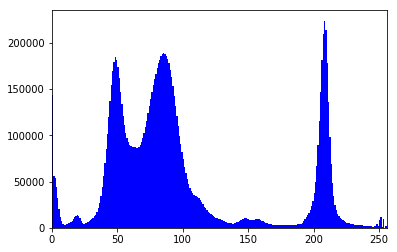

In [46]:
plt.hist(b_chanel.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.show()

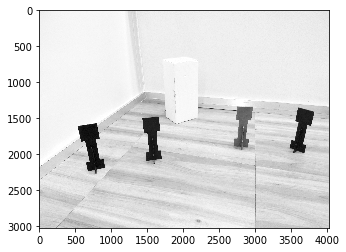

In [47]:
plt.imshow(r_chanel, cmap="Greys_r", vmin=0, vmax=255)

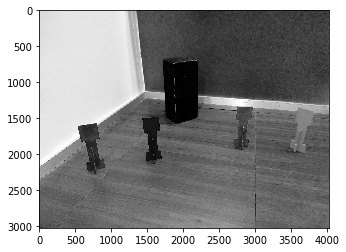

In [48]:
plt.imshow(b_chanel, cmap="Greys_r", vmin=0, vmax=255)

### Resposta:

Sim, é possível identificar a caixa vermelha e o creeper azul.

### 2.

In [61]:
saida = canto_sala_rgb.copy()

for i in range(r_chanel.shape[0]):
    for j in range(r_chanel.shape[1]):
        if r_chanel[i][j] > 253:
            saida[i][j] = 255
        else:
            saida[i][j] = 0
            
for i in range(b_chanel.shape[0]):
    for j in range(b_chanel.shape[1]):
        if b_chanel[i][j] < 5:
            saida[i][j] = 255
        else:
            saida[i][j] = 0

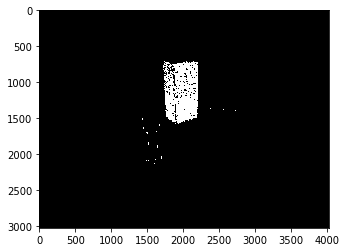

In [62]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [55]:
box_battery = cv2.imread("hall_box_battery_atividade3.png")

In [56]:
box_battery_gray = cv2.cvtColor(box_battery, cv2.COLOR_BGR2GRAY)

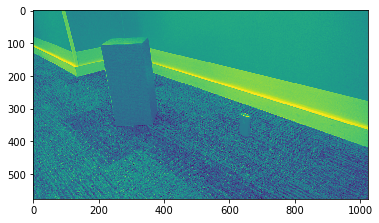

In [57]:
plt.imshow(box_battery_gray)

In [58]:
saida = box_battery_gray.copy()

for i in range(box_battery_gray.shape[0]-1):
    for j in range(box_battery_gray.shape[1]-1):
        saida[i][j] = abs(int(box_battery_gray[i][j+1])-int(box_battery_gray[i][j-1]))

In [59]:
saida.shape

(576, 1024)

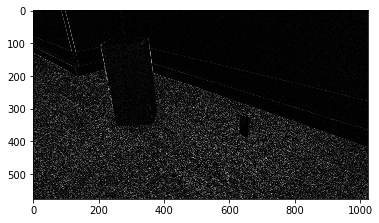

In [60]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)